## Campus Recruitment Prediction
### Predicting a Categorical Variable Using Multiple Models


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.pipeline import Pipeline


### Reading dataset  

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


We don't need columns like 'sl_no' and 'salary', as we are going to take 'status' as our taget variable for predicting this categorical variable

In [4]:
df.drop(['sl_no','salary'], axis = 1, inplace= True)

In [5]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,0,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,0,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,1,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [6]:
#Looking for duplicates, nulls in our dataset

df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

In [7]:
df.duplicated().sum()

0

There are no nulls and duplicates in our dataset

Let's look more into the data for datatype errors and statistics 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 22.0+ KB


All datatypes are perfect but when I looked in the valuecounts, I found the data is unbalanced,
as shown below 

In [9]:

df['status'].value_counts()
df['status'].value_counts(normalize=True)

status
Placed        0.688372
Not Placed    0.311628
Name: proportion, dtype: float64

We will be working with alorithms which has the parameter to balance the classes using weights while training the model.

We can use sampling techniques to balance the dataset, but our dataset is small and this can lead to overfitting.

In [10]:
df.describe(include = 'all')

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
count,215.000000,215.000000,215,215.000000,215,215,215.000000,215,215,215.000000,215,215.000000,215
unique,NaN,NaN,2,NaN,2,3,NaN,3,2,NaN,2,NaN,2
top,NaN,NaN,Central,NaN,Others,Commerce,NaN,Comm&Mgmt,No,NaN,Mkt&Fin,NaN,Placed
freq,NaN,NaN,116,NaN,131,113,NaN,145,141,NaN,120,NaN,148
mean,0.353488,67.303395,NaN,66.333163,NaN,NaN,66.370186,NaN,NaN,72.100558,NaN,62.278186,NaN
std,0.479168,10.827205,NaN,10.897509,NaN,NaN,7.358743,NaN,NaN,13.275956,NaN,5.833385,NaN
min,0.000000,40.890000,NaN,37.000000,NaN,NaN,50.000000,NaN,NaN,50.000000,NaN,51.210000,NaN
25%,0.000000,60.600000,NaN,60.900000,NaN,NaN,61.000000,NaN,NaN,60.000000,NaN,57.945000,NaN
50%,0.000000,67.000000,NaN,65.000000,NaN,NaN,66.000000,NaN,NaN,71.000000,NaN,62.000000,NaN
75%,1.000000,75.700000,NaN,73.000000,NaN,NaN,72.000000,NaN,NaN,83.500000,NaN,66.255000,NaN


In [11]:
df['gender'] = df['gender'].astype('object')
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [12]:
#Splitting test and train sets

y = df['status']
X = df.drop(['status'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [13]:
# checking all the numerical and categorical columns
numerical_cols = []
categorical_cols = []
for i in df.columns:
    if df[i].dtype == 'object' and i != 'status':
        categorical_cols.append(i)
    elif df[i].dtype != 'object':
        numerical_cols.append(i)

print('Numerical = ', numerical_cols)
print('Categorical = ', categorical_cols)

Numerical =  ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
Categorical =  ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']


In [14]:

scaler = StandardScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

Let's get onto the part of encoding categorical features


All these categorical columns can be encoded simply using label encoding

In [15]:
le = LabelEncoder()

for i in categorical_cols:
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.fit_transform(X_test[i])
    
y_test = le.fit_transform(y_test)
y_train = le.fit_transform(y_train)

In [16]:
X_train

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
93,0,-1.394730,0,-0.354257,0,1,-1.601854,0,0,-0.051326,1,-1.151702
84,0,0.262928,0,-0.266971,1,2,0.517889,2,1,-1.326412,0,-0.038470
95,0,0.539205,0,1.042309,1,1,-0.144531,0,1,1.708292,0,-0.011442
137,0,-0.013348,1,-0.266971,0,1,0.782857,0,0,-1.251407,1,-0.307065
210,0,1.239105,1,1.391451,1,1,1.524767,0,0,1.373770,0,2.071433
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,-0.558534,1,-1.401682,1,2,-1.601854,2,0,-0.126331,0,0.584872
14,0,-0.473809,0,-1.663538,0,1,-2.131790,0,0,0.248694,1,-1.227719
92,1,-0.636812,0,0.256741,0,2,-0.012047,0,0,-0.051326,0,-0.465857
179,1,0.981247,0,-0.179686,0,2,-0.250518,2,0,0.211192,1,1.674453


### Model Selection and Training

As this is a classification problem, I will be working with these 3 models - Logestic Regression, Random Forest Classifier, Support Vector Mcahine

For the following reasons, I'm using these 3 models - 

Logestic Regression - Simple to implement, interpret, and computationally efficient 

Random Forest Classifier - Uses multiple decision trees, provides feature importance

Support Vector Mcahine - Effective in high-dimensional spaces and when the number of dimensions exceeds the number of samples. Uses kernel trick to handle non-linear data.

In [18]:
#Logistic Regression
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_proba = log_reg.predict_proba(X_test)[:, 1]  

accuracy_lr = accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression Accuracy:", accuracy_lr)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_log_proba)

roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")


Logistic Regression Accuracy: 0.8604651162790697

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.90      0.90      0.90        31

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43

AUC: 0.93


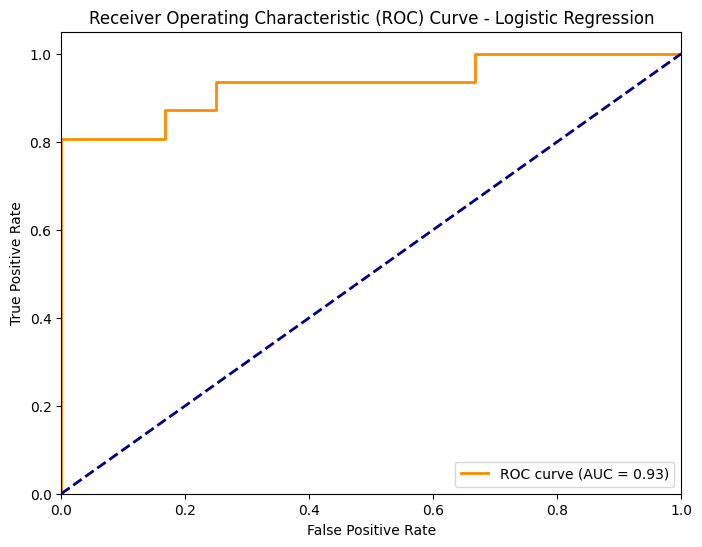

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()


In [20]:
#Random Forest
random_forest = RandomForestClassifier(class_weight='balanced')
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

y_pred_rf_proba = random_forest.predict_proba(X_test)[:, 1]  
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf )
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf_proba)

roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")


Random Forest Accuracy: 0.813953488372093

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.83      0.94      0.88        31

    accuracy                           0.81        43
   macro avg       0.79      0.72      0.74        43
weighted avg       0.81      0.81      0.80        43

AUC: 0.88


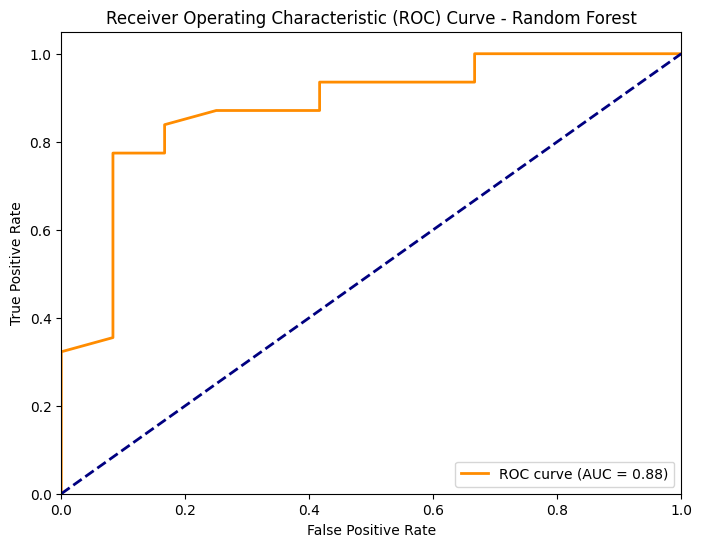

In [21]:

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


In [22]:
#SVM
svm = SVC(class_weight='balanced', probability=True)
svm.fit(X_train, y_train)

# Predict probabilities and calculate accuracy
y_pred_svm = svm.predict(X_test)
y_pred_svm_proba = svm.predict_proba(X_test)[:, 1]

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

SVM Accuracy: 0.8604651162790697

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.90      0.90      0.90        31

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43

AUC: 0.93


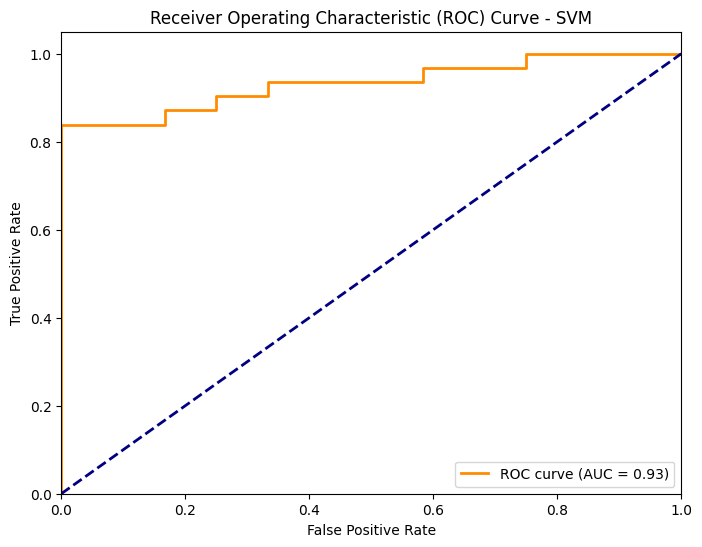

In [23]:

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc='lower right')
plt.show()


### Hyperparameter Tuning

In [25]:
#defining a pipeline
pipe = Pipeline([('classifier', LogisticRegression())])


In [26]:
#Parameter grid for our 3 models

param_grid = [
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__class_weight': ['balanced']
    },
    {
        'classifier': [RandomForestClassifier()],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__class_weight': ['balanced']
    },
    {
        'classifier': [SVC()],
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'classifier__class_weight': ['balanced']
    }
]

In [27]:
# Initialize and fit GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters found by GridSearchCV: {'classifier': RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=5, n_estimators=300), 'classifier__class_weight': 'balanced', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
Best cross-validation accuracy: 0.8900840336134455


In [28]:

best_model = RandomForestClassifier(class_weight='balanced', n_estimators= 200, max_depth= None, min_samples_split= 5, min_samples_leaf= 1)

best_model.fit(X_train, y_train)

# Predicting on test data
y_pred = best_model.predict(X_test)

# Accuracy score on test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

#Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy on test set: 0.7907

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.81      0.94      0.87        31

    accuracy                           0.79        43
   macro avg       0.76      0.68      0.70        43
weighted avg       0.78      0.79      0.77        43



### Summary from all the above models 

#### Logistic Regression and SVM:

Accuracy: 0.8605

Precision, recall, and F1-score for both classes are reasonably balanced.

#### Random Forest:

Accuracy: 0.7674

Precision and recall for the 'Not Placed' class are significantly lower compared to Logistic Regression and SVM.

#### Grid Search Best Parameters

The Random Forest model, after hyperparameter tuning using GridSearchCV, improved its performance:

Accuracy: 0.8140

Precision, recall, and F1-score for the 'Placed' class improved, but the 'Not Placed' class still shows lower recall.

### Model Selection:

Since Logistic Regression and SVM have shown the same accuracy and balanced classification reports, either could be a strong candidate.
The Random Forest model's performance improved after tuning, but it still lags behind Logistic Regression and SVM in terms of overall metrics.


In [29]:

# Create a voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('svc', svm) ],
    voting='soft'  # 'soft' voting takes into account the probability of each class
)

# Training and predicting the voting classifier
voting_clf.fit(X_train, y_train)
y_pred_vc = voting_clf.predict(X_test)

#Accuracy
accuracy_vc = accuracy_score(y_test, y_pred_vc)
print(f"Voting Classifier Accuracy: {accuracy_vc:.4f}")

# Classification report
print("Classification Report (Voting Classifier):")
print(classification_report(y_test, y_pred_vc))


Voting Classifier Accuracy: 0.8837
Classification Report (Voting Classifier):
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



In [30]:
# Individual model predictions
y_pred_lr = log_reg.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Individual model accuracies
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print individual model accuracies
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")

print("\nPerformance Comparison:")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"Voting Classifier Accuracy: {accuracy_vc:.4f}")

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))

print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))



Logistic Regression Accuracy: 0.8605
SVM Accuracy: 0.8605

Performance Comparison:
Logistic Regression Accuracy: 0.8605
SVM Accuracy: 0.8605
Voting Classifier Accuracy: 0.8837

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.90      0.90      0.90        31

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43


Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.90      0.90      0.90        31

    accuracy                           0.86        43
   macro avg       0.83      0.83      0.83        43
weighted avg       0.86      0.86      0.86        43



#### Interpretation:

##### Accuracy: 
The Voting Classifier shows a slight improvement over both Logistic Regression and SVM. This improvement indicates that combining predictions from multiple models (even if they perform similarly individually) can enhance overall performance.

##### Precision and Recall: 
The Voting Classifier generally maintains or improves upon the precision and recall of class '1' (Placed), which is often a critical metric depending on the application.

In [31]:
import pickle
# Save the model to disk
filename = 'voting_clf.pkl'
pickle.dump(voting_clf, open(filename, 'wb'))
